In [1]:
#here we import data nothing special
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('lung cancer survey.csv')
data.head(100)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,60,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
96,F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
97,M,59,2,1,1,2,1,1,1,1,2,2,2,1,1,YES
98,M,64,1,2,2,2,1,2,2,1,1,2,1,2,1,YES


since most of all data i boolean values and are true or false but they are between 1 and 2 we need to decrease all og them by one and we don't need and label encoder or something else just simple math operation

In [2]:

for column in data.columns.to_list():
    if column not in ['GENDER','AGE','LUNG_CANCER']:
        data[column] =data[column] - 1


here we got gender data no null value just M and F data but since or data can't train on this we need to label  it numeric so model we use can work with it 

In [3]:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
gender = data['GENDER']
result = label.fit_transform(gender)
data['GENDER'] = result


well here we don't do somthing strange just rescale our data between 1 and 0 

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_of_age = data['AGE']
data_of_age = np.array(data_of_age)
data_of_age = data_of_age.reshape(-1, 1)
data.AGE = scaler.fit_transform(data_of_age)

well after we finished preprocessing our input data maybe it's time to make some changes to prediction output 
here we just label or data to 0 and 1 other than it's actual value yes and no 

In [5]:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
have_cancer = data['LUNG_CANCER']
result = label.fit_transform(have_cancer)
data['LUNG_CANCER'] = result
data.LUNG_CANCER


0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

well before we jump to what we did here lets see something down there
this is corr matrix show relationship between parameters and so on i decided to remove some parameters and don't use it on model since it's don't have major effect on lung cancer
but you might ask why i kept smoking it's don't seems have no effect on number it's true but on real life it's not

In [6]:

data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


i removed some attribute here

In [7]:

all_attributes = list(data)
need_excluded_attributes = ['AGE', 'GENDER', 'CHRONIC DISEASE', 'SHORTNESS OF BREATH']
def remove_attr(items_to_remove):
    all_attributes = list(data)
    for remove_item in items_to_remove:
        all_attributes.remove(remove_item)
    return all_attributes

new_all_attributes = remove_attr(need_excluded_attributes)
new_all_attributes.remove('LUNG_CANCER')

 a bar chart of data et nothing special about it 

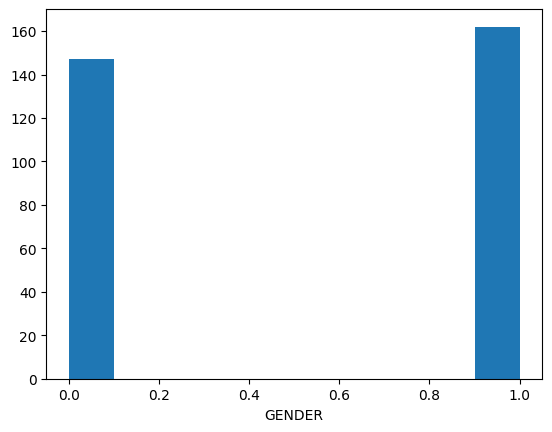

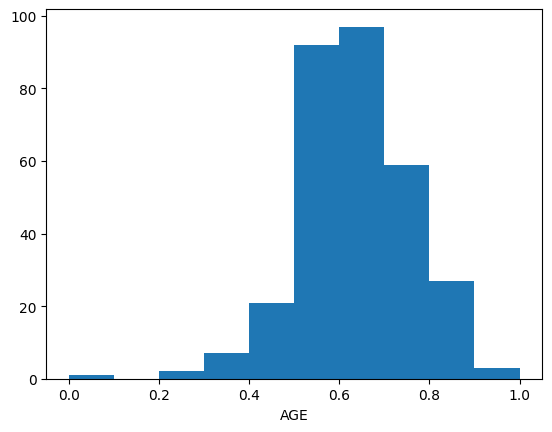

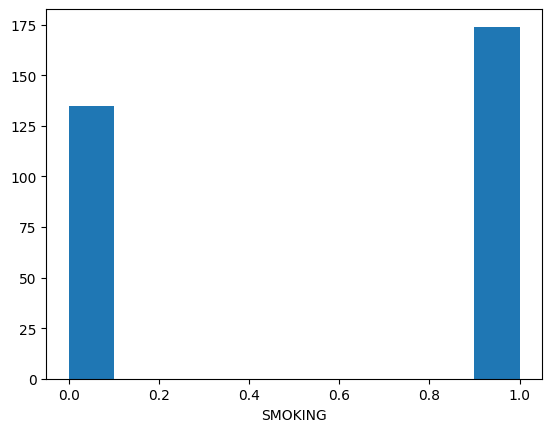

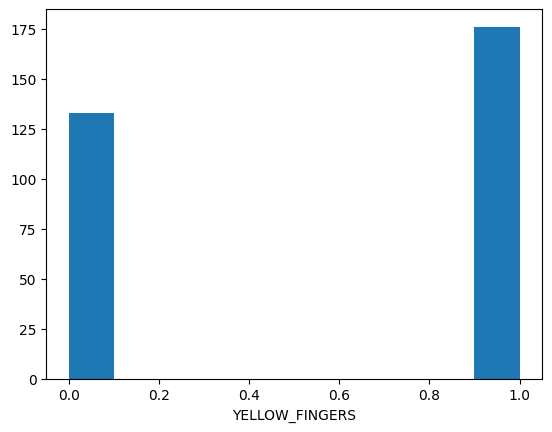

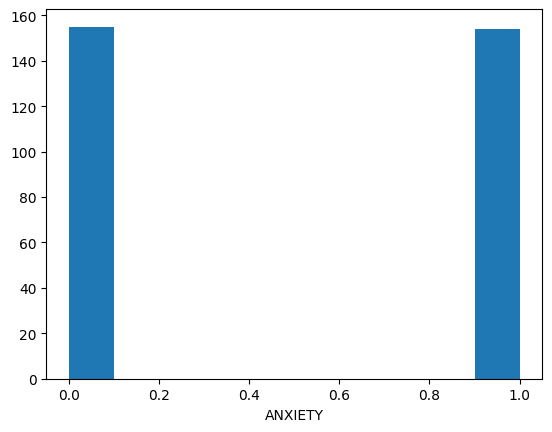

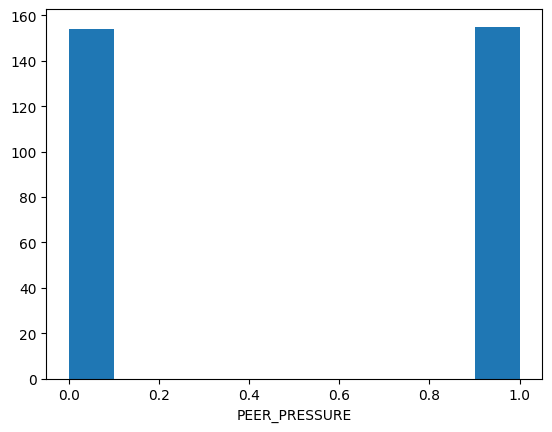

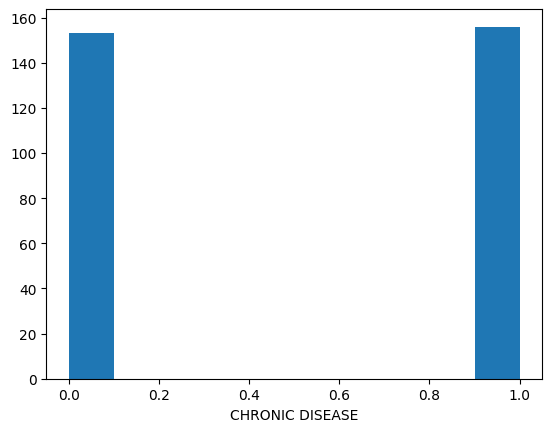

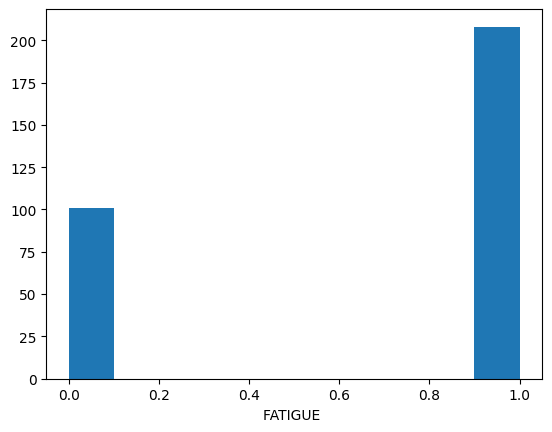

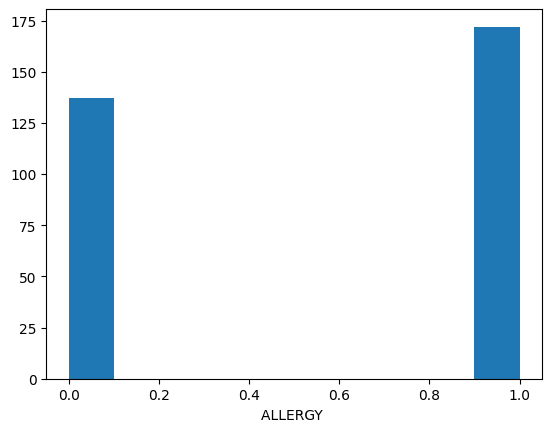

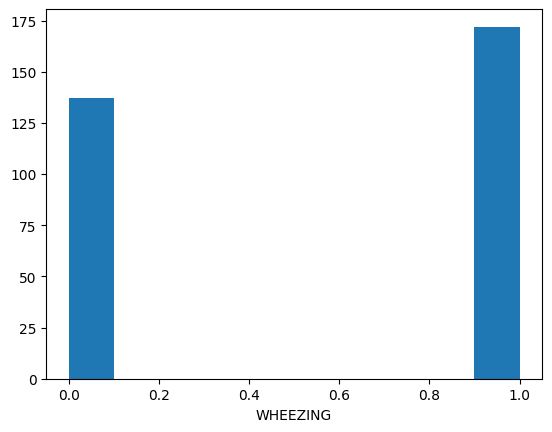

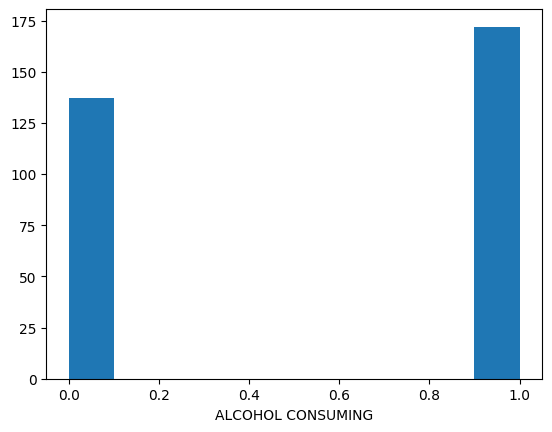

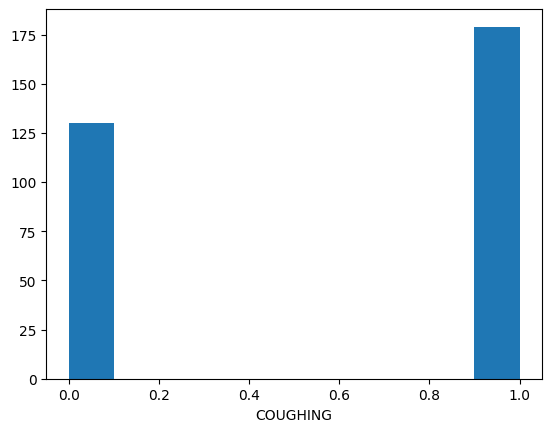

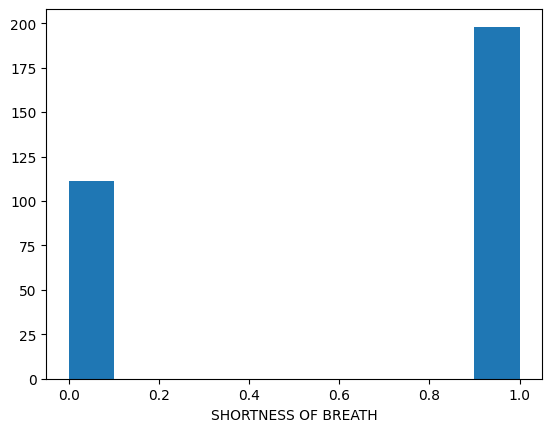

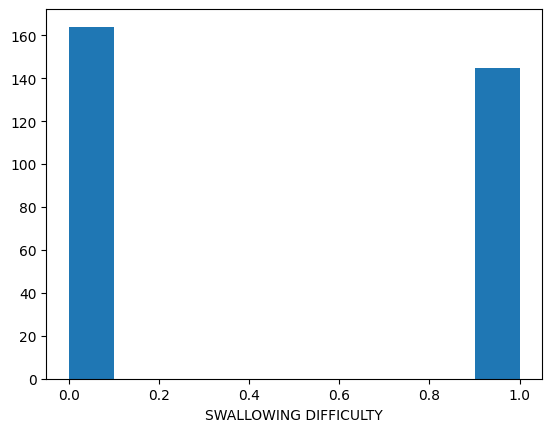

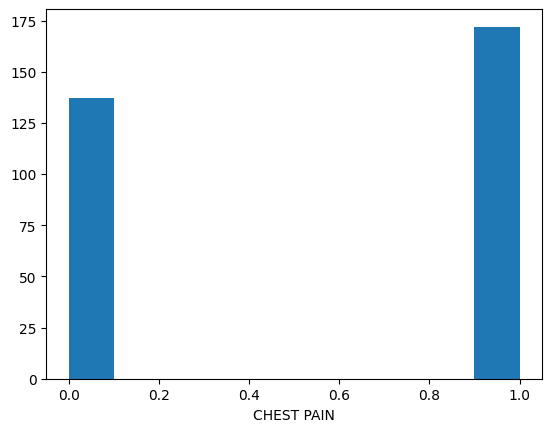

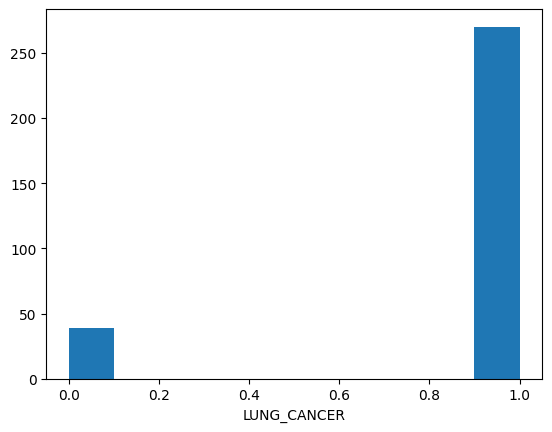

In [8]:
for attre in all_attributes :
    plt.hist(data[attre])
    plt.xlabel(attre)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(data[new_all_attributes],data['LUNG_CANCER'],test_size=0.2)


In [10]:
def write_on_file(models_result:dict,model_name:str,description:str):
    """ models result is key value data that should have accuracy ,recall and precision score , should have three keys,'accuracy', 'recall','precision'.
      models_name is name of model that we calculate scores on it descriptio is string who describe model based on it's arugment like how many depth and tree we have in random forest """
    accuracy_score_train = models_result['accuracy_train']
    accuracy_score_test = models_result['accuracy_test']
    recall_score_train = models_result['recall_train']
    recall_score_test = models_result['recall_test']
    precision_score_train = models_result['precision_train']
    precision_score_test = models_result['precision_test']
    with open('models_accuracy_results.txt','a') as file:
        file.write(f'name of model is :\n{model_name}\n')
        file.write(f'with features of {description}\n')
        file.write('and this is model results\n')
        file.write(f'accuracy score for train is :\n{accuracy_score_train}\n')
        file.write(f'accuracy score for test is :\n{accuracy_score_test}\n')
        file.write(f'recall score for train is :\n{recall_score_train}\n')
        file.write(f'recall score for test is :\n{recall_score_test}\n')
        file.write(f'precision score for train is :\n{precision_score_train}\n')
        file.write(f'precision score for test is :\n{precision_score_test}\n')
        file.write('-'*80+'\n')
        file.close()

In [11]:

from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,accuracy_score
support_vetor = SVC()
support_vetor.fit(train_x,train_y)
pred_y_test = support_vetor.predict(test_x)
pred_y_train = support_vetor.predict(train_x)

model_result = dict()
model_result['recall_test'] = recall_score(y_true=test_y,y_pred=pred_y_test)
model_result['accuracy_test'] = accuracy_score(y_true=test_y,y_pred=pred_y_test)
model_result['precision_test'] = precision_score(y_true=test_y,y_pred=pred_y_test)
model_result['precision_train'] = precision_score(y_true=train_y,y_pred=pred_y_train)
model_result['recall_train'] = recall_score(y_true=train_y,y_pred=pred_y_train)
model_result['accuracy_train'] = accuracy_score(y_true=train_y,y_pred=pred_y_train)

In [36]:
#checked this algorithm with any solver with max iterations count of 1000 and minimum 12  at last got the same
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score
logistic_regression = LogisticRegression()
logistic_regression.fit(train_x,train_y)
pred_y_test = logistic_regression.predict(test_x)
pred_y_train = logistic_regression.predict(train_x)
model_result = dict()
model_result['recall_test'] = recall_score(y_true=test_y,y_pred=pred_y_test)
model_result['accuracy_test'] = accuracy_score(y_true=test_y,y_pred=pred_y_test)
model_result['precision_test'] = precision_score(y_true=test_y,y_pred=pred_y_test)
model_result['precision_train'] = precision_score(y_true=train_y,y_pred=pred_y_train)
model_result['recall_train'] = recall_score(y_true=train_y,y_pred=pred_y_train)
model_result['accuracy_train'] = accuracy_score(y_true=train_y,y_pred=pred_y_train)
print('result of test',model_result['accuracy_test'])
print('result of train',model_result['accuracy_train'])
    

result of test 0.9032258064516129
result of train 0.9271255060728745


D:\DjangoCourse\Machine_learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#this is need to be fixed 
def read_on_file():
   mydata = []
   with open('models_accuracy_results.txt','r') as file:
       data = file.readlines()
       i = 0
       while i < len(data):
            i+=1
            model_name = data[i]
            i+=4
            accuracy_score = data[i]
            i+=2
            recall_score = data[i]
            i+=2 
            precision_score = data[i]
            i+=2
            values = {'accuracy':accuracy_score.strip(),'recall':recall_score.strip(),'precision':precision_score.strip(),'model_name':model_name.strip()}
            mydata.append(values)
       file.close()
       return  mydata
    

In [14]:
data = read_on_file()

IndexError: list index out of range